## 下面开始机器学习


In [74]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

2.9.1


数据集来咯

In [75]:
with np.load('唐诗处理后数据集.npz', allow_pickle=True) as data:
    print(data.files)
    train_x,test_x,train_y,test_y = data['train_x'], data['test_x'], data['train_y'], data['test_y']
print(train_x.shape)
# train_x.astype(int)
# train_x.dtype

['train_x', 'test_x', 'train_y', 'test_y']
(23877, 1)


解读回去

In [76]:
import json
with open('中文到整数转换表.json') as f:
    j = json.load(f)
    # print(j)
    整数到中文转换表 = ['' for i in range(len(j))]
    for (汉字, 数字) in j.items():
        整数到中文转换表[数字] = 汉字
整数到中文转换表

['，',
 '。',
 '十',
 '卷',
 '百',
 '一',
 '不',
 '人',
 '三',
 '二',
 '四',
 '五',
 '山',
 '日',
 '六',
 '無',
 '八',
 '七',
 '風',
 '中',
 '上',
 '雲',
 '有',
 '九',
 '春',
 '白',
 '天',
 '何',
 '來',
 '月',
 '花',
 '水',
 '時',
 '相',
 '長',
 '君',
 '歸',
 '秋',
 '年',
 '為',
 '生',
 '自',
 '行',
 '江',
 '見',
 '夜',
 '心',
 '知',
 '李',
 '如',
 '此',
 '得',
 '清',
 '下',
 '高',
 '去',
 '南',
 '空',
 '明',
 '在',
 '子',
 '門',
 '事',
 '客',
 '送',
 '道',
 '未',
 '處',
 '居',
 '東',
 '別',
 '金',
 '歌',
 '王',
 '多',
 '青',
 '是',
 '寒',
 '玉',
 '城',
 '雨',
 '遠',
 '朝',
 '家',
 '落',
 '新',
 '出',
 '今',
 '與',
 '西',
 '應',
 '寄',
 '陽',
 '思',
 '千',
 '前',
 '聲',
 '入',
 '書',
 '路',
 '萬',
 '馬',
 '望',
 '草',
 '我',
 '同',
 '飛',
 '深',
 '樹',
 '和',
 '流',
 '開',
 '將',
 '盡',
 '酒',
 '獨',
 '還',
 '已',
 '聞',
 '回',
 '成',
 '地',
 '煙',
 '光',
 '詩',
 '公',
 '重',
 '可',
 '石',
 '誰',
 '色',
 '林',
 '欲',
 '從',
 '雪',
 '古',
 '作',
 '州',
 '方',
 '向',
 '更',
 '之',
 '：',
 '海',
 '首',
 '樓',
 '看',
 '舊',
 '老',
 '易',
 '張',
 '情',
 '滿',
 '身',
 '然',
 '後',
 '愁',
 '香',
 '名',
 '過',
 '言',
 '黃',
 '衣',
 '能',
 '外',
 '遊',
 '頭'

In [77]:
# https://blog.csdn.net/gavin_john/article/details/50717695 中括号取item运算符重载
def decode_poetry(num_array):
    return "".join(map(整数到中文转换表.__getitem__, num_array))
a = train_x[2200]
print(a.dtype)
# print(a)
# a[0]
decode_poetry(a[0])

object


'朱藤朱藤，溫如紅玉，直如朱繩。自我得爾以為杖，中途不進，部曲多回。唯此朱藤，實隨我來。瘴癘之鄉，或水或陸，自北徂南。泥黏雪滑，足力不堪。吾本兩足，吾與爾披雲撥水，環山繞野。二年蹋遍匡廬間，'

In [78]:
import json
with open('作者到整数转换表.json') as f:
    j = json.load(f)
    # print(j)
    整数到作者转换表 = ['' for i in range(len(j))]
    for (作者, 数字) in j.items():
        整数到作者转换表[数字] = 作者
整数到作者转换表

['白居易',
 '杜甫',
 '李白',
 '齊己',
 '劉禹錫',
 '元稹',
 '李商隱',
 '貫休',
 '韋應物',
 '陸龜蒙',
 '劉長卿',
 '許渾',
 '皎然',
 '杜牧',
 '羅隱',
 '張籍',
 '姚合',
 '錢起',
 '賈島',
 '孟郊',
 '王建',
 '岑參',
 '韓愈',
 '張祜',
 '皮日休',
 '王維',
 '溫庭筠',
 '權德輿',
 '方幹',
 '韋莊',
 '杜荀鶴',
 '盧綸',
 '韓偓',
 '張說',
 '戴叔倫',
 '李中',
 '吳融',
 '李端',
 '薛能',
 '孟浩然',
 '趙嘏',
 '徐鉉',
 '徐夤',
 '皇甫冉',
 '李群玉',
 '李賀',
 '顧況',
 '司空圖',
 '高適',
 '李嶠',
 '李頻',
 '鄭穀',
 '黃滔',
 '施肩吾',
 '周曇',
 '張九齡',
 '宋之問',
 '武元衡',
 '鮑溶',
 '耿湋',
 '李益',
 '儲光羲',
 '司空曙',
 '沈佺期',
 '王昌齡',
 '柳宗元',
 '馬戴',
 '朱慶餘',
 '張喬',
 '李洞',
 '唐彥謙',
 '韓翃',
 '胡曾',
 '楊巨源',
 '曹松',
 '羅鄴',
 '李鹹用',
 '劉得仁',
 '許棠',
 '李德裕',
 '李嘉佑',
 '李頎',
 '李紳',
 '駱賓王',
 '雍陶',
 '戎昱',
 '鄭谷',
 '劉商',
 '陳陶',
 '盧照鄰',
 '李涉',
 '呂岩',
 '蘇頲',
 '曹鄴',
 '呂溫',
 '劉滄',
 '張蠙',
 '崔塗',
 '項斯',
 '無可',
 '羊士諤',
 '周賀',
 '盧仝',
 '薛逢',
 '徐凝',
 '元結',
 '陳子昂',
 '李世民',
 '李建勳',
 '獨孤及',
 '王勃',
 '歐陽詹',
 '殷堯藩',
 '李山甫',
 '薛濤',
 '吳筠',
 '孫元晏',
 '劉駕',
 '劉兼',
 '郎士元',
 '顧非熊',
 '劉言史',
 '李郢',
 '嚴維',
 '章孝標',
 '崔道融',
 '王貞白',
 '李隆基',
 '喻鳧',
 '陳羽',
 '牟融',
 '楊衡',
 '孫逖',
 '汪遵',
 '裴夷直',
 '王周'

In [79]:
def decode_poet(num):
    return 整数到作者转换表[num]
a = train_y[2200]
print(a.dtype)
# print(a)
# a[0]
decode_poet(a)

int32


'白居易'

In [80]:
train_x = [x[0] for x in train_x]
test_x = [x[0] for x in test_x]
print(decode_poetry(test_x[0]))
decode_poet(test_y[0])

露冷風輕霽魄圓，高樓更在碧山巔。四溟水合疑無地，夜深獨與岩僧語，群動消聲舉世眠。


'唐彥謙'

整数数组必须在输入神经网络之前转换为张量。这种转换可以通过以下两种方式来完成：
将数组转换为表示单词出现与否的由 0 和 1 组成的向量，类似于 one-hot 编码。例如，序列[3, 5]将转换为一个 10,000 维的向量，该向量除了索引为 3 和 5 的位置是 1 以外，其他都为 0。然后，将其作为网络的首层——一个可以处理浮点型向量数据的稠密层。不过，这种方法需要大量的内存，需要一个大小为 num_words * num_reviews 的矩阵。
或者，我们可以填充数组来保证输入数据具有相同的长度，然后创建一个大小为 max_length * num_reviews 的整型张量。我们可以使用能够处理此形状数据的嵌入层作为网络中的第一层。
在本教程中，我们将使用第二种方法。
由于电影评论长度必须相同，我们将使用 pad_sequences 函数来使长度标准化：

In [81]:
print(max(map(len, train_x)))
print(max(map(len, test_x)))
# 不妙，数据处理的时候应当限制为五言、七言、绝句、律诗

4500
2400


In [109]:
l = list(map(len, train_x))
import pandas as pd
l_df = pd.DataFrame(l)
l_df.describe()

,0
count,23877.000000
mean,65.490849
std,85.064456
min,12.000000
25%,40.000000
50%,48.000000
75%,60.000000
max,4500.000000


In [110]:
vocab_size = 7611
train_data = keras.preprocessing.sequence.pad_sequences(train_x,
                                                        value=vocab_size,
                                                        padding='post',
                                                        maxlen=65)

test_data = keras.preprocessing.sequence.pad_sequences(test_x,
                                                       value=vocab_size,
                                                       padding='post',
                                                       maxlen=65)
# 假入强行56，会怎么样？  TODO 可以改为4500

In [111]:
print(decode_poetry([i for i in test_data[0] if i != vocab_size]))
len(train_data[0]), len(train_data[1])

露冷風輕霽魄圓，高樓更在碧山巔。四溟水合疑無地，夜深獨與岩僧語，群動消聲舉世眠。


(65, 65)

In [112]:
print(set(train_y))
print(set(test_y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


In [121]:
# 输入形状是用于诗词的汉字数目（7611 词）
vocab_size = 7611
poets = 100

model = keras.Sequential()
# 第一维始终是batch的大小。
model.add(keras.layers.Embedding(vocab_size+1, 16)) # 变成16个字
# 官方解释：查找每个词索引的嵌入向量（embedding vector）
# 嵌入向量是16维的。
# 对于一系列batch的数据，把bx56 嵌入到b个 不知道多长的，每个单词变长16维向量的一个向量
model.add(keras.layers.GlobalAveragePooling1D()) # 把变长的张量变长定长的？
# 对于每一个 嵌入向量，每个单词16维，一句话不定长，直接把一句话的词向量求平均加起来。
# model.add(keras.layers.Dense(256, activation='relu')) # （输出为）16个单元的全连接层。
# model.add(keras.layers.Dense(1600, activation='relu')) # （输出为）16个单元的全连接层。
model.add(keras.layers.Dense(poets, activation='softmax')) #对上一层的结构dense为一个，然后sigmoid？


model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 16)          121792    
                                                                 
 global_average_pooling1d_12  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_23 (Dense)            (None, 100)               1700      
                                                                 
Total params: 123,492
Trainable params: 123,492
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [123]:
from keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=1)

In [124]:
history = model.fit(train_data, train_y, epochs=10)

Epoch 1/10
747/747 [==============================] - 2s 2ms/step - loss: 4.4024 - accuracy: 0.0873
Epoch 2/10
747/747 [==============================] - 1s 2ms/step - loss: 4.2697 - accuracy: 0.0887
Epoch 3/10
747/747 [==============================] - 1s 2ms/step - loss: 4.2074 - accuracy: 0.0925
Epoch 4/10
747/747 [==============================] - 1s 2ms/step - loss: 4.1549 - accuracy: 0.0972
Epoch 5/10
747/747 [==============================] - 1s 2ms/step - loss: 4.1057 - accuracy: 0.1013
Epoch 6/10
747/747 [==============================] - 1s 2ms/step - loss: 4.0560 - accuracy: 0.1105
Epoch 7/10
747/747 [==============================] - 1s 2ms/step - loss: 4.0055 - accuracy: 0.1231
Epoch 8/10
747/747 [==============================] - 1s 2ms/step - loss: 3.9527 - accuracy: 0.1338
Epoch 9/10
747/747 [==============================] - 1s 2ms/step - loss: 3.8970 - accuracy: 0.1413
Epoch 10/10
747/747 [==============================] - 1s 2ms/step - loss: 3.8373 - accuracy: 0.1509

In [125]:
results = model.evaluate(test_data,  test_y, verbose=2)
print(results)  # 好垃圾，没有加隐藏层，对测试集反而好呢

187/187 - 0s - loss: 3.8942 - accuracy: 0.1430 - 279ms/epoch - 1ms/step
[3.8941891193389893, 0.14304856956005096]


In [119]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

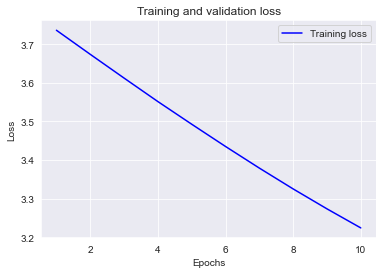

In [120]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'b', label='Training loss')
# b代表“蓝色实线”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [105]:
# model(train_data[0])

ValueError: Exception encountered when calling layer "sequential_10" (type Sequential).

Input 0 of layer "global_average_pooling1d_10" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (56, 16)

Call arguments received by layer "sequential_10" (type Sequential):
  • inputs=tf.Tensor(shape=(56,), dtype=int32)
  • training=None
  • mask=None